# matplotlib 활용
- 보다 다양한 데이터 시각화 구성
- from [Nicolas P. Rougier](https://github.com/rougier/matplotlib-tutorial)

## 1. 삼각함수를 양의구간 / 음의구간에 다른 색상을 적용

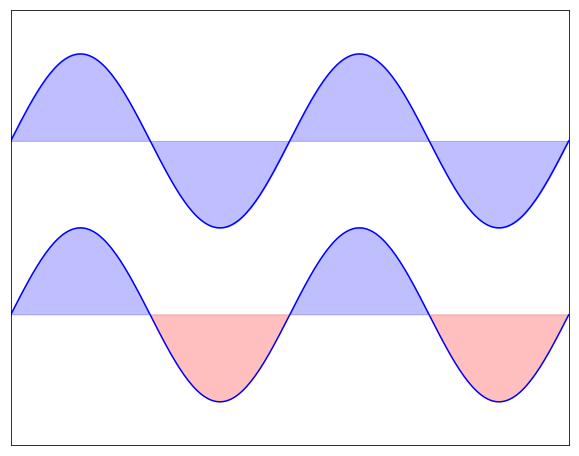

In [1]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.figure(figsize=(10,8))
plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])
plt.show()

## 2. Scatter using cmap as arctan
- numpy.random.normal()으로 랜덤한 분포를 얻고, 이러한 값으로 부터 얻는 arctan 값을 cmap 함수로써 사용
- 색상의 분포가 각 사분면별로 나누어짐

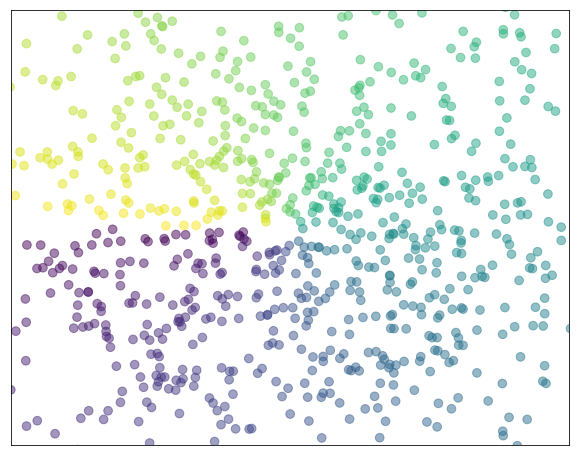

In [3]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.figure(figsize=(10,8))
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()

## 3. 기존의 bar 그래프를 상단/하단으로 나누어 적용

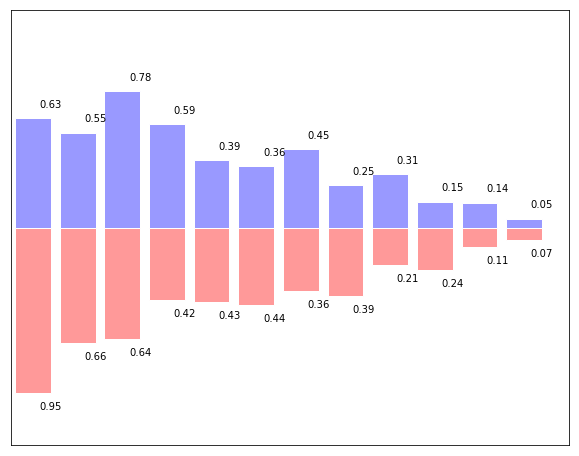

In [5]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.figure(figsize=(10,8))

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.4, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1.25,+1.25), plt.yticks([])

# savefig('../figures/bar_ex.png', dpi=48)
plt.show()

## 4. 등고선 / 사물의 윤곽 ( contour )
- contour을 사용하여 높낮이를 표현 할 수 있다.

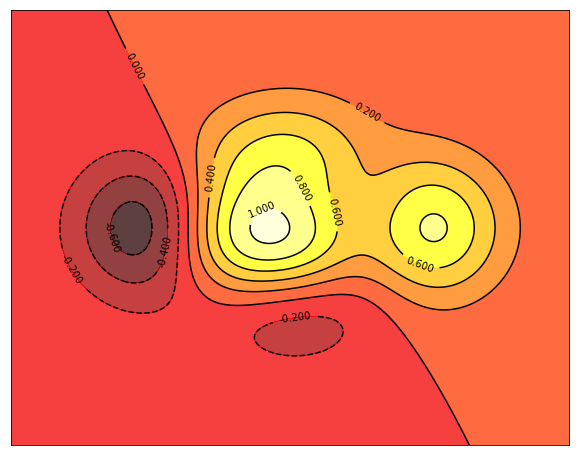

In [7]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(10,8))

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
# savefig('../figures/contour_ex.png',dpi=48)
plt.show()

## 5. Pie ( Characteristic point )

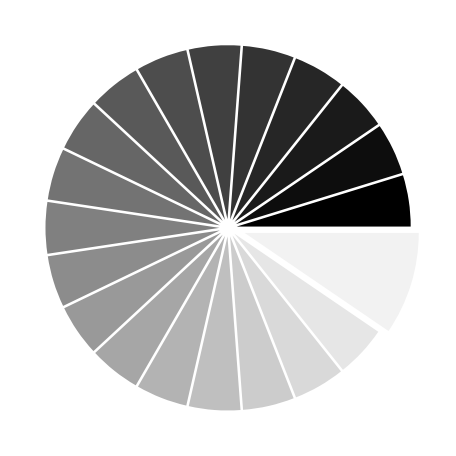

In [9]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.figure(figsize=(10,8))

plt.pie(Z, explode=Z*.05, colors = ['%f' % (i/float(n)) for i in range(n)])
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])

# savefig('../figures/pie_ex.png',dpi=48)
plt.show()

## 6. 극좌표계(polar)에서의 bar

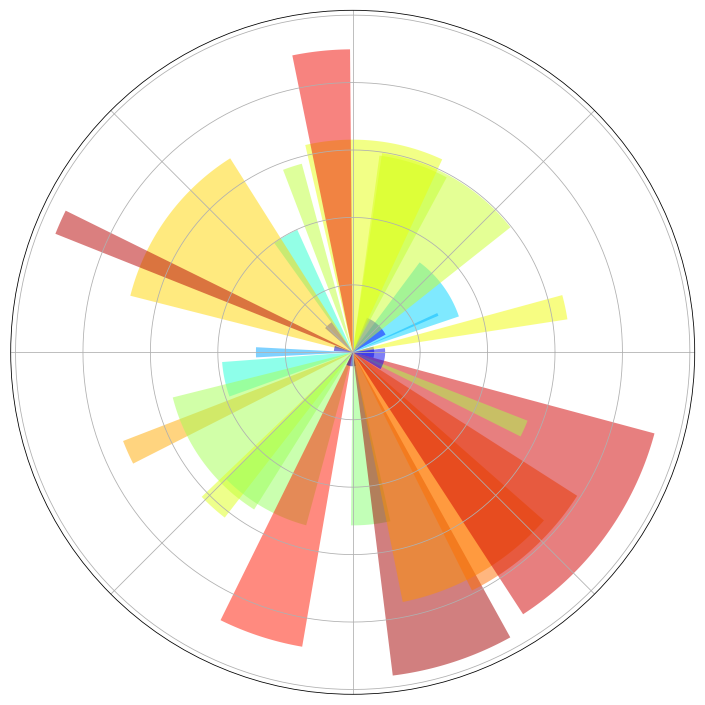

In [10]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 30
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
# savefig('../figures/polar_ex.png',dpi=48)
plt.show()

### 7. Tag Cloud

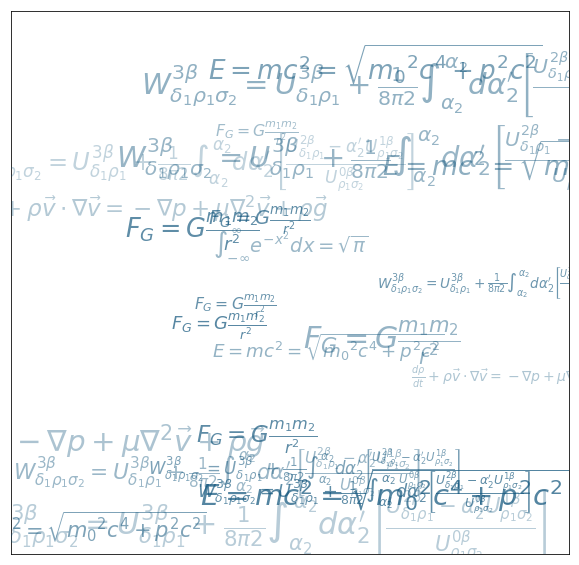

In [11]:
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))

plt.figure(figsize=(10,10))

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])
# savefig('../figures/text_ex.png',dpi=48)
plt.show()